In [39]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 

In [40]:
Air_pass=pd.read_csv('AirPassengers.csv')
Air_pass.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [41]:
Air_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [42]:
Air_pass.isnull().sum()


Month          0
#Passengers    0
dtype: int64

In [43]:
Air_pass.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [44]:
Air_pass['Month']=pd.to_datetime(Air_pass['Month'])
Air_pass.set_index('Month',inplace=True)
Air_pass.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


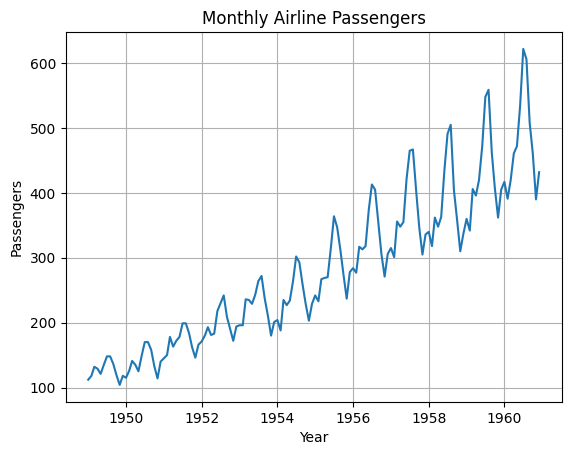

In [45]:
plt.plot(Air_pass)
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()

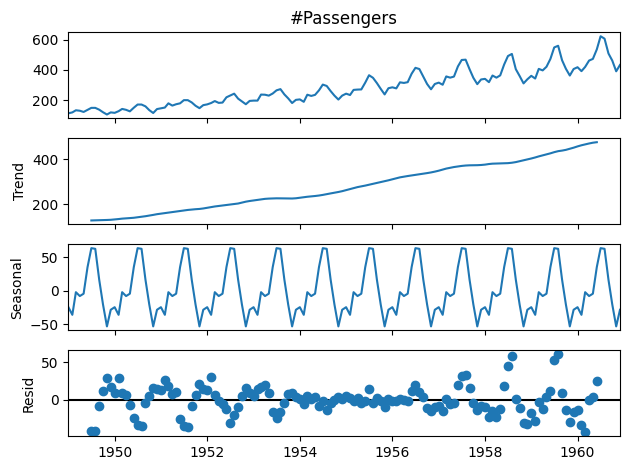

In [46]:
res=seasonal_decompose(Air_pass['#Passengers'],model='AIC')
res.plot()
plt.show()

In [47]:
adf_res=adfuller(Air_pass['#Passengers'])
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
print(adf_res)

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
(np.float64(0.8153688792060482), np.float64(0.991880243437641), 13, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(996.692930839019))


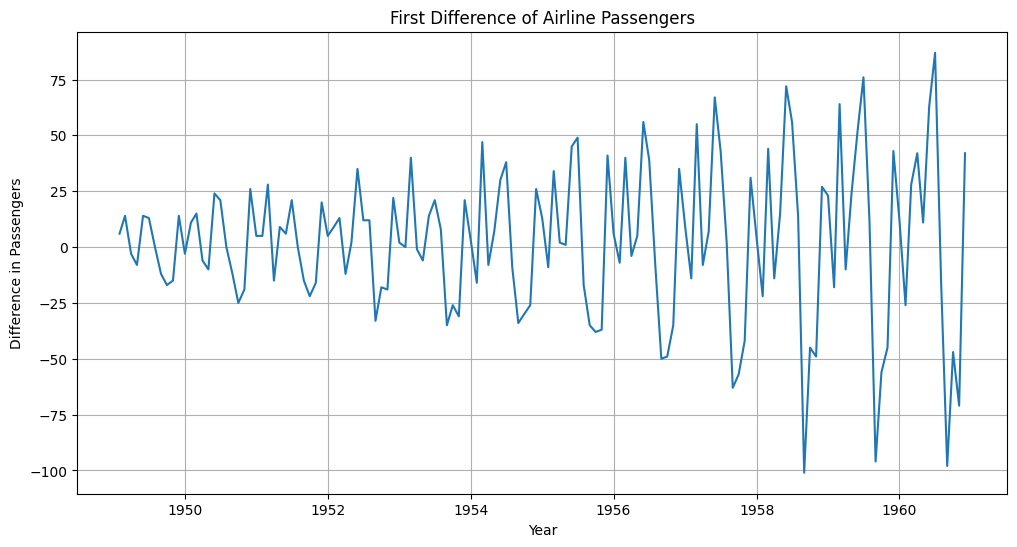


ADF Test for Differenced Series:
ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255


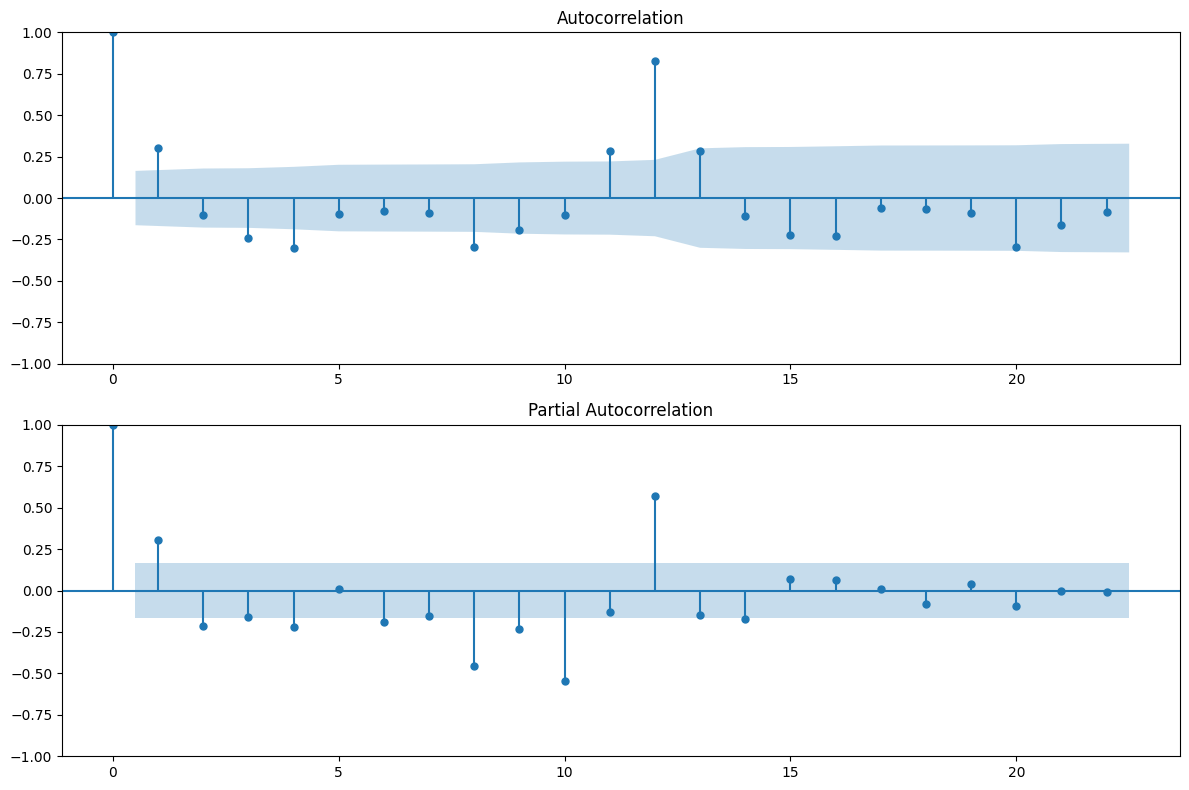

In [48]:
# Take first difference to make series stationary
Air_pass['First_Difference'] = Air_pass['#Passengers'].diff()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(Air_pass['First_Difference'])
plt.title('First Difference of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Difference in Passengers')
plt.grid(True)
plt.show()

# Check stationarity of differenced series
adf_diff = adfuller(Air_pass['First_Difference'].dropna())
print('\nADF Test for Differenced Series:')
print(f'ADF Statistic: {adf_diff[0]}')
print(f'p-value: {adf_diff[1]}')

# Import and create ACF/PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(Air_pass['First_Difference'].dropna(), ax=ax1)
plot_pacf(Air_pass['First_Difference'].dropna(), ax=ax2)
plt.tight_layout()
plt.show()

c:\Users\RAM MOHAN\Machine_learning\Time_series_forecasting\Air_paasengers\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAM MOHAN\Machine_learning\Time_series_forecasting\Air_paasengers\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAM MOHAN\Machine_learning\Time_series_forecasting\Air_paasengers\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAM MOHAN\Machine_learning\Time_series_forecasting\Air_paasengers\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA AIC: 1394.6825053251882
SARIMA AIC: 1022.2987933276692


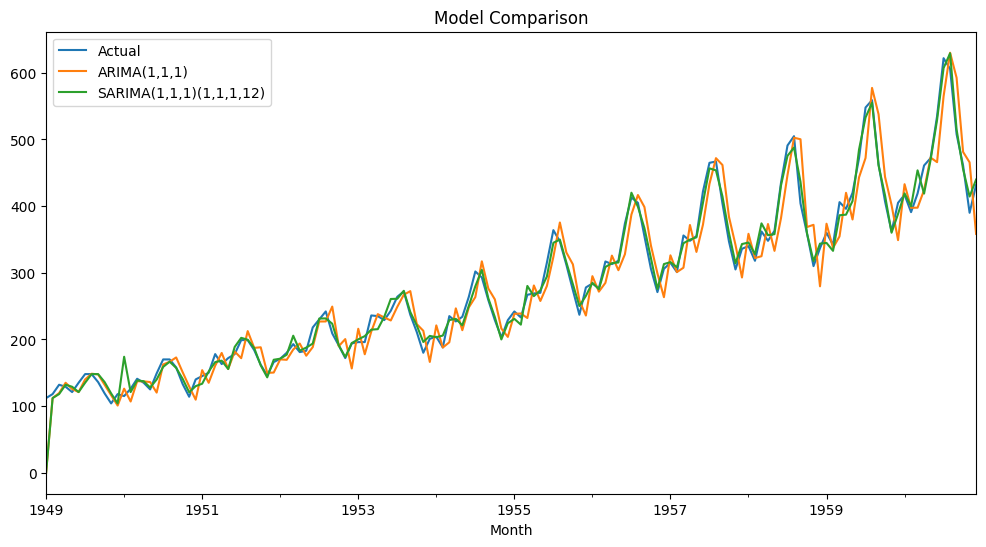

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA(1,1,1) model
model_arima = SARIMAX(Air_pass['#Passengers'], order=(1,1,1))
results_arima = model_arima.fit()

# Fit SARIMA model with seasonal component
# order=(1,1,1) for non-seasonal part
# seasonal_order=(1,1,1,12) for seasonal part
model_sarima = SARIMAX(Air_pass['#Passengers'], 
                      order=(1,1,1), 
                      seasonal_order=(1,1,1,12))
results_sarima = model_sarima.fit()

# Compare AIC values
print("ARIMA AIC:", results_arima.aic)
print("SARIMA AIC:", results_sarima.aic)

# Plot predictions from both models
fig, ax = plt.subplots(figsize=(12,6))
Air_pass['#Passengers'].plot(ax=ax, label='Actual')
results_arima.fittedvalues.plot(ax=ax, label='ARIMA(1,1,1)')
results_sarima.fittedvalues.plot(ax=ax, label='SARIMA(1,1,1)(1,1,1,12)')
plt.legend()
plt.title('Model Comparison')
plt.show()

c:\Users\RAM MOHAN\Machine_learning\Time_series_forecasting\Air_paasengers\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAM MOHAN\Machine_learning\Time_series_forecasting\Air_paasengers\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


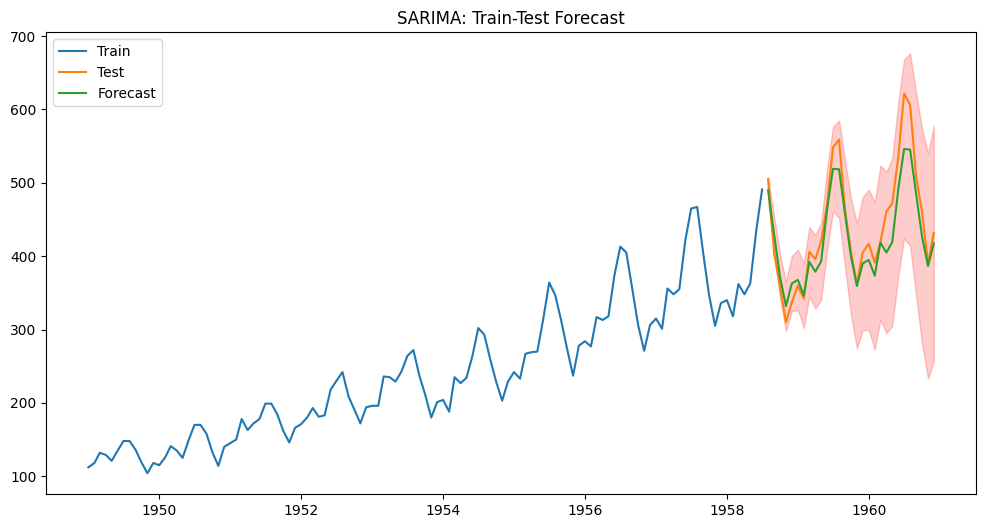

RMSE: 908.53 | MAE: 23.56

Next 12 months forecast:
1958-08-01    489.724162
1958-09-01    429.406290
1958-10-01    372.216678
1958-11-01    331.836815
1958-12-01    362.700224
1959-01-01    367.720132
1959-02-01    346.377860
1959-03-01    392.239627
1959-04-01    378.878194
1959-05-01    392.924070
1959-06-01    464.527024
1959-07-01    519.093308
Freq: MS, Name: predicted_mean, dtype: float64


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train-test split
train_size = int(len(Air_pass) * 0.8)
train, test = Air_pass[:train_size], Air_pass[train_size:]

# Fit SARIMA model
try:
    model = SARIMAX(train['#Passengers'], 
                   order=(1,1,1), 
                   seasonal_order=(1,1,1,12))
    result = model.fit()

    # Forecast on test set
    forecast = result.get_forecast(steps=len(test))
    pred = forecast.predicted_mean
    ci = forecast.conf_int()

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(train.index, train['#Passengers'], label='Train')
    plt.plot(test.index, test['#Passengers'], label='Test')
    plt.plot(test.index, pred, label='Forecast')
    plt.fill_between(test.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.2)
    plt.title('SARIMA: Train-Test Forecast')
    plt.legend()
    plt.show()

    # Metrics
    rmse = mean_squared_error(test['#Passengers'], pred)
    mae = mean_absolute_error(test['#Passengers'], pred)

    print(f'RMSE: {rmse:.2f} | MAE: {mae:.2f}')

    # Future forecast
    future = result.get_forecast(steps=12)
    print("\nNext 12 months forecast:")
    print(future.predicted_mean)

except Exception as e:
    print(f"An error occurred: {str(e)}")